In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Fake Sensor Data

In [2]:
N_SAMPLES = 500

In [3]:
input_range = np.linspace(0, 2*np.pi, N_SAMPLES, dtype=np.float64) # range from 0 to 2*pi because of sine function

In [4]:
signal = np.sin(input_range)

In [5]:
noise = np.random.normal(0, 1, N_SAMPLES) # random noise with mu=0, sigma=1 

In [6]:
assert noise.shape == input_range.shape

In [7]:
noisy_signal = signal + noise/5

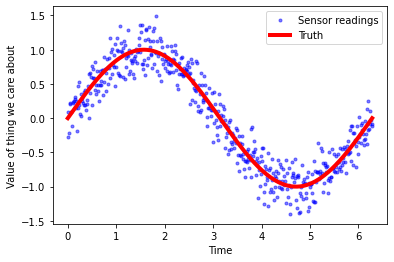

In [8]:
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5)
plt.plot(input_range, signal,'r-', linewidth=4)
plt.legend(['Sensor readings', 'Truth'])
plt.xlabel('Time')
plt.ylabel('Value of thing we care about')
plt.show() 

# Filtering Noise

In [9]:
del signal # With a noisy signal, we don't know the truth: we hope to reconstruct it.

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess # adapted from noise filtering slides

In [11]:
filtered = lowess(noisy_signal, input_range, frac=0.1)

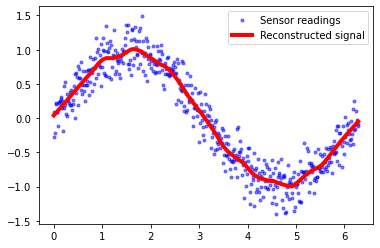

In [12]:
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5)
plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=4)
plt.legend(['Sensor readings', 'Reconstructed signal'])
plt.show()